In [1]:
import numpy as np
# from projectile import simulator_multioutput, print_results
import mogp_emulator
from mogp_emulator.MeanFunction import Coefficient, LinearMean, MeanFunction
import pandas as pd
from scipy.io import savemat, loadmat
try:
    import matplotlib.pyplot as plt
    makeplots = True
except ImportError:
    makeplots = False
import pickle
def lin2db(x):
    return 10*np.log10(x)
def db2lin(x):
    return 10**(x/10) 
launch_powers = loadmat("data/input_data_mW.mat")['lnch_pow_mW']
noise_powers = loadmat("data/output_data_mW.mat")['tot_noise_pow_mW']

In [11]:
inputs = launch_powers
targets = noise_powers[:,0]

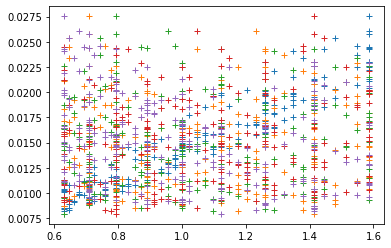

In [12]:
plt.plot(inputs,targets,'+')
plt.show()

In [13]:
launch_powers.shape

(250, 5)

In [14]:
# mf = "I(x[0]**3)"
mf = "I(x[0]**3) + I(x[0]*x[1]**2) + I(x[0]*x[2]**2) + I(x[0]*x[3]**2) + I(x[0]*x[4]**2)"  # left-most channel
# mf = "I(x[2]**3) + I(x[2]*x[1]**2) + I(x[2]*x[3]**2) + I(x[2]*x[0]**2) + I(x[2]*x[4]**2)"  # centre channel
# mf = "I(x[4]**3) + I(x[4]*x[3]**2) + I(x[4]*x[2]**2) + I(x[4]*x[1]**2) + I(x[4]*x[0]**2)"  # right-most channel
print(MeanFunction(mf))

c + c*x[0]^3.0 + c*x[0]*x[1]^2.0 + c*x[0]*x[2]^2.0 + c*x[0]*x[3]^2.0 + c*x[0]*x[4]^2.0


In [15]:
# gp_map = mogp_emulator.GaussianProcess(inputs, targets, mean=mf)
gp_map = mogp_emulator.GaussianProcess(inputs, targets, mean=mf, kernel='SquaredExponential', nugget="fit")
# fit hyperparameters
gp_map = mogp_emulator.fit_GP_MAP(gp_map)
# gp can be called directly if only the means are desired
pred_means = gp_map(inputs)

Matrix not positive definite, skipping this iteration


In [16]:
print(gp_map.theta)

GPParams with:
mean = [0.00882688 0.00227621 0.00023307 0.00029499 0.0007116  0.00036755]
correlation = [ 0.9789348  20.98602244 20.72939516 26.00874784  0.46071361]
covariance = 2.634861820449094e-05
nugget = 1.078499536119127e-08


In [17]:
print("ASE [dBm] = ",lin2db(gp_map.theta.mean[0]))
print("SPM [dBm] = ", lin2db(gp_map.theta.mean[1]))
print("XPM 1 [dBm] = ", lin2db(gp_map.theta.mean[2]))
print("XPM 2 [dBm] = ", lin2db(gp_map.theta.mean[3]))
print("XPM 3 [dBm] = ", lin2db(gp_map.theta.mean[4]))
print("XPM 4 [dBm] = ", lin2db(gp_map.theta.mean[5]))

ASE [dBm] =  -20.541927589565447
SPM [dBm] =  -26.427872215271314
XPM 1 [dBm] =  -36.325113177493364
XPM 2 [dBm] =  -35.30191591622098
XPM 3 [dBm] =  -31.477667149769278
XPM 4 [dBm] =  -34.346855572044596


In [ ]:
lin2db(gp_map.theta.mean[1])

In [ ]:
pred_means.shape

In [ ]:
inputs[:,0].shape

In [ ]:
inputs_plt = lin2db(inputs[:,0])
pred_means_plt = lin2db(pred_means)
targets_plt = lin2db(targets)

plt.plot(inputs_plt, pred_means_plt, '+')
plt.plot(inputs_plt, targets_plt, 'x')
plt.show()

In [ ]:
np.mean(abs(pred_means - targets))

TO DOs:
- work out how to obtain mean function parameters from fitted GP 
- try different mean functions
- see if extrapolation is improved with non-zero mean

In [ ]:
pip list